In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import sys
data_sa_fno = loadmat('sa-fno/Results/Earthquake_responses_test.mat') # Load the .mat file
input_sa_fno = data_sa_fno['x_test']
target_sa_fno = data_sa_fno['y_test']
prediction_sa_fno = data_sa_fno['y_pred']
print(input_sa_fno.shape) # Input 
print(target_sa_fno.shape) # Output Target
print(prediction_sa_fno.shape) # Output Prediction

data_fno = loadmat('fno/Results/Earthquake_responses_test.mat') # Load the .mat file
input_fno = data_fno['x_test']
target_fno = data_fno['y_test']
prediction_fno = data_fno['y_pred']
print(input_fno.shape) # Input 
print(target_fno.shape) # Output Target
print(prediction_fno.shape) # Output Prediction

time = loadmat('data/dataset_EQ.mat')['time'][0,21::] # Load the .mat file
print(time.shape) # Signal length


(200, 5980, 1)
(200, 5980, 6)
(200, 5980, 6)
(200, 5980, 1)
(200, 5980, 6)
(200, 5980, 6)
(5980,)


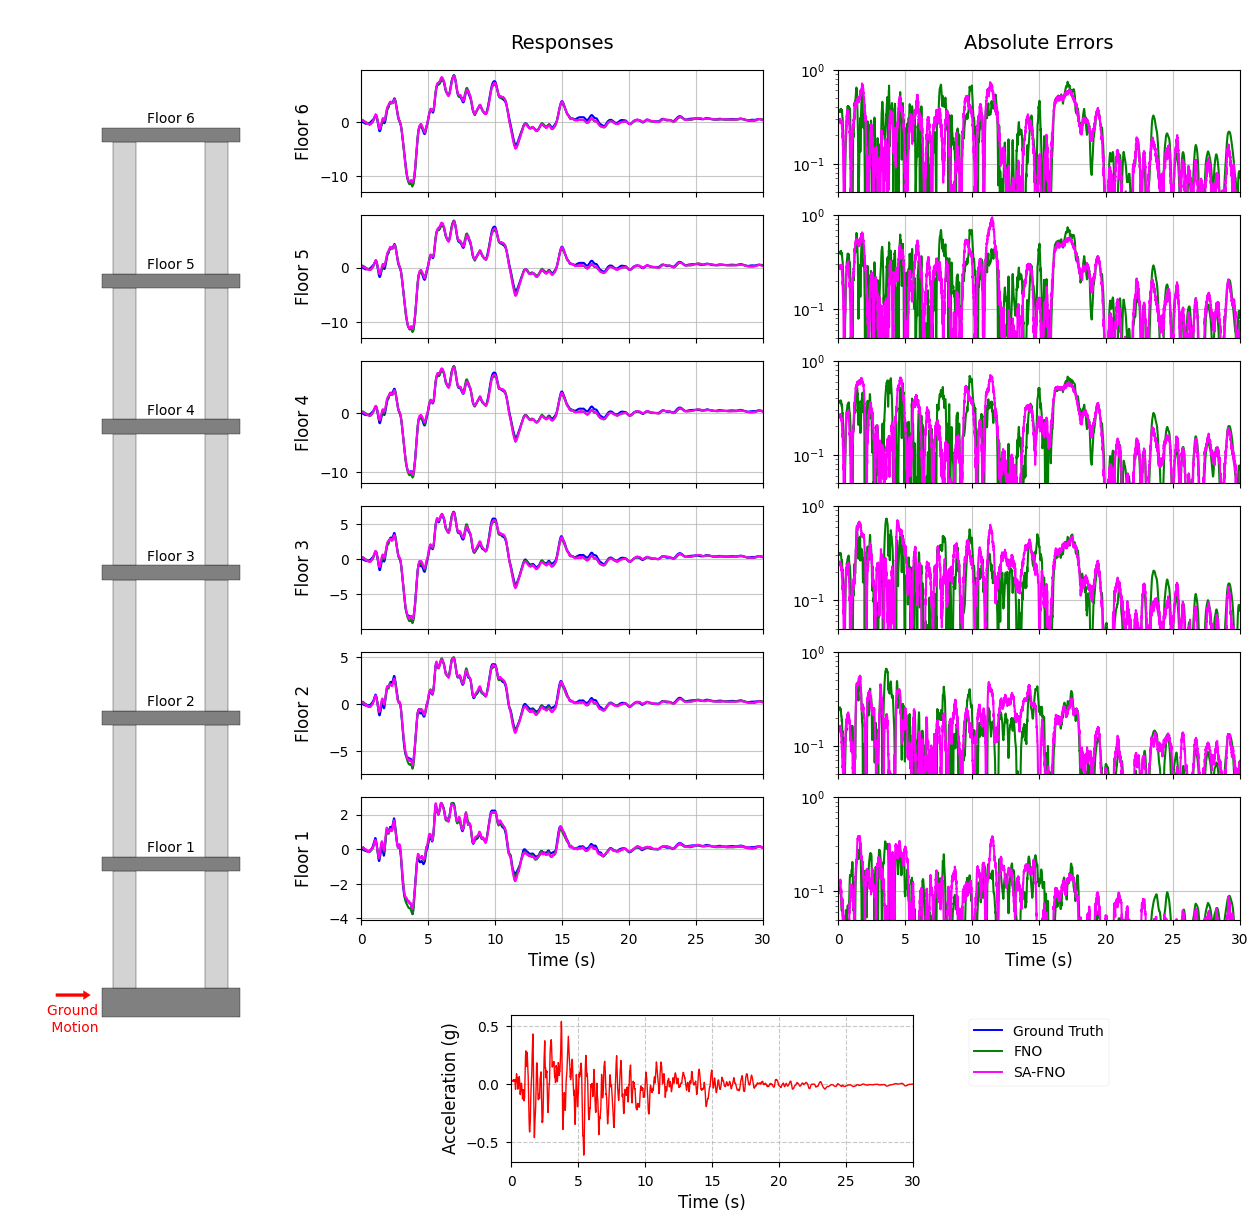

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow
from matplotlib.gridspec import GridSpec
import sys

t = time
sam_num = 40 #100
input_data = input_fno[sam_num,:]

y_test = target_fno[sam_num,:,:].T
y_pred_solver1 = prediction_fno[sam_num,:,:].T # FNO
y_pred_solver2 = prediction_sa_fno[sam_num,:,:].T # SA-FNO
y_solver1_error = np.abs(y_pred_solver1 - y_test)
y_solver2_error = np.abs(y_pred_solver2 - y_test)

plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.figsize': (15, 12)
})

# Create figure with GridSpec for custom layout
fig = plt.figure(constrained_layout=False)  
gs = GridSpec(8, 3, width_ratios=[0.8, 1, 1], 
              height_ratios=[0.3, 1, 1, 1, 1, 1, 1, 1.2],  
              figure=fig)
# Set tight spacing between subplots
gs.update(hspace=0.2, wspace=0.2)

# Draw building structure
ax_building = fig.add_subplot(gs[1:, 0])  # Adjusted to account for header row
floor_heights = np.linspace(0, 6, 7)

# Adjust ground motion arrow and text
ax_building.add_patch(Arrow(0, 0.15, 0.15, 0, width=0.10, color='red'))  
ax_building.text(-0.04, -0.1, 'Ground \n Motion', color='red')  


# Draw floors and columns
for i in range(len(floor_heights)):
    thickness = 0.2 if i == 0 else 0.1
    y_pos = floor_heights[i] 
    
    # Draw floor (grey box)
    ax_building.add_patch(Rectangle((0.2, y_pos), 0.6, thickness, 
                                    facecolor='gray', edgecolor='black'))
    
    # Draw columns
    if i < len(floor_heights) - 1:
        column_y_start = y_pos + thickness  
        ax_building.add_patch(Rectangle((0.25, column_y_start), 0.1, 
                                        floor_heights[i+1] - floor_heights[i] - thickness,
                                        facecolor='lightgray', edgecolor='black'))
        ax_building.add_patch(Rectangle((0.65, column_y_start), 0.1, 
                                        floor_heights[i+1] - floor_heights[i] - thickness,
                                        facecolor='lightgray', edgecolor='black'))

# Add floor labels between columns
for i in range(6):
    floor_num = i+1 
    ax_building.text(0.5, floor_heights[i] + 1.16, f'Floor {floor_num}',
                    horizontalalignment='center', verticalalignment='center')

# Set axis limits and turn off axes
ax_building.set_xlim(-0.2, 1.2)
ax_building.set_ylim(-0.5, 6.5)
ax_building.axis('off')

# Add header strips
ax_header1 = fig.add_subplot(gs[0, 1])
ax_header1.set_facecolor('#f0f0f0')
ax_header1.text(0.5, 0.1, 'Responses', horizontalalignment='center', verticalalignment='center', fontsize=14)
ax_header1.axis('off')

ax_header2 = fig.add_subplot(gs[0, 2])
ax_header2.set_facecolor('#f0f0f0')
ax_header2.text(0.5, 0.1, 'Absolute Errors', horizontalalignment='center', verticalalignment='center', fontsize=14)
ax_header2.axis('off')

# Create response plots
# Floor 0 acceleration plots
ax0_solver1 = fig.add_subplot(gs[7, 1])
ax0_solver1.plot(t, input_data, 'red', linewidth=1)
ax0_solver1.set_ylabel('Acceleration (g)')
ax0_solver1.set_xlabel('Time (s)')
ax0_solver1.grid(True, linestyle='--', alpha=0.7)
ax0_solver1.set_xlim([0, t[-1]])

ax_legend = fig.add_subplot(gs[7, 2])
ax_legend.plot([], [], '-', color='blue', label='Ground Truth')
ax_legend.plot([], [], '-', color='green', label='FNO')
ax_legend.plot([], [], '-', color='magenta', label='SA-FNO')
ax_legend.legend(loc='center')
ax_legend.axis('off')

for i in range(6):
    # Responses
    ax_s1 = fig.add_subplot(gs[6-i, 1])
    ax_s1.plot(t, y_test[i], color='blue', linewidth=1.5)
    ax_s1.plot(t, y_pred_solver1[i], '-', color='green', linewidth=1.5)
    ax_s1.plot(t, y_pred_solver2[i], '-', color='magenta', linewidth=1.5)
    ax_s1.set_ylabel(f'Floor {i+1}')
    ax_s1.yaxis.set_label_coords(-0.12, 0.5)
    ax_s1.grid(True, linestyle='-', alpha=0.7)
    ax_s1.set_xlim([0, t[-1]])
    
    # Show x-axis only for Floor 1 errors
    if i != 0:  # All floors except Floor 1
        ax_s1.set_xticklabels([])
    else:  # Floor 1
        ax_s1.set_xlabel('Time (s)')
    
    # Errors
    ax_s2 = fig.add_subplot(gs[6-i, 2])
    ax_s2.plot(t, y_solver1_error[i], '-', color='green', linewidth=1.5, label='FNO')
    ax_s2.plot(t, y_solver2_error[i], '-', color='magenta', linewidth=1.5, label='SA-FNO')
    ax_s2.grid(True, linestyle='-', alpha=0.7)
    ax_s2.set_yscale('log')
    ax_s2.set_xlim([0, t[-1]])
    
    # Dynamically adjust the y-axis range
    max_error = max(np.max(y_solver1_error[i]), np.max(y_solver2_error[i]))
    upper_limit = 10 ** np.ceil(np.log10(max_error))  # Ceiling to the next power of 10
    lower_limit = 5*upper_limit * 10**-2  # Two orders of magnitude smaller
    ax_s2.set_ylim([lower_limit, upper_limit])
    
    # Show x-axis only for Floor 1 errors
    if i != 0:  # All floors except Floor 1
        ax_s2.set_xticklabels([])
    else:  # Floor 1
        ax_s2.set_xlabel('Time (s)')

# Adjust the layout to make it more compact
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.95)

pos_solver1 = ax0_solver1.get_position()  # Get current position
ax0_solver1.set_position([pos_solver1.x0 +0.1 , pos_solver1.y0 - 0.06, pos_solver1.width, pos_solver1.height])  
pos_legend = ax_legend.get_position()  # Get current position
ax_legend.set_position([pos_legend.x0, pos_legend.y0 - 0.03, pos_legend.width, pos_legend.height]) 

pos_building = ax_building.get_position()  # Get the current position of the building subplot
ax_building.set_position([pos_building.x0 + 0.03, pos_building.y0, pos_building.width, pos_building.height])  # Move slightly right

plt.savefig('eq_response_fno_sa-fno.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()